In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [2]:
# Load the Boston House Pricing dataset
dataset = load_boston()

# Create a dataframe from the data
df = pd.DataFrame(dataset.data)

# Replace column names with feature names
df.columns = dataset.feature_names

# Creating another column in the dataframe for the target prices
df['PRICE'] = dataset.target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# Let's take the number of rooms as our X values
x = df.RM
y = df.PRICE
print(x.shape, y.shape)

(506,) (506,)


In [4]:
X = np.expand_dims(x, axis=1)

X_train = X[:-20]
y_train = y[:-20]

X_test = X[-20:]
y_test = y[-20:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(486, 1) (486,)
(20, 1) (20,)


In [5]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients:', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: [9.126359]
Mean squared error: 18.73
Variance score: 0.20


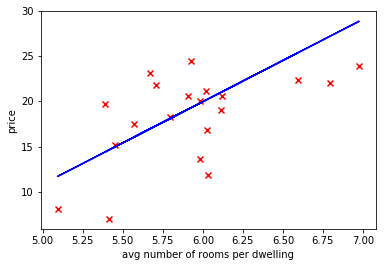

In [6]:
# Plot outputs
plt.scatter(X_test, y_test, marker='x', color='red')
plt.plot(X_test, y_pred, color='blue')
plt.xlabel('avg number of rooms per dwelling')
plt.ylabel('price')
plt.show()